# Cartopy

`cartopy` is a Python map plotting package. It was originally developed by meteorologists at the UK Met Office, as plotting gridded model output and observational data onto easy-to-read maps is a common task in the field. Combined with `matplotlib` it works well for making contour plots of maps for Climate Data Analysis

For the full documentation follow this [link](https://scitools.org.uk/cartopy/docs/latest/). 

# Proplot

A succinct `matplotlib` wrapper for making beautiful, publication-quality graphics. This project is published on `GitHub` and can be cited using its [Zenodo DOI](https://zenodo.org/record/5602155#.Y9RLyS-B33Q).

For the full documentation follow this [link](https://proplot.readthedocs.io/en/stable/). 

## Plotting gridded data

We will use CMIP5 data for surface air temperature (tas) from the RCP4.5 scenario produced by the NCAR/CCSM4 model. For this example, we will use only the first ensemble member.

The data are located in the following directory on Hopper: /home/cstan/classes/clim670/data/

The filename is: tas_Amon_CCSM4_rcp45_r1i1p1_210101-229912.nc

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import proplot as pplt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

In [2]:
path = '/home/cstan/classes/clim670/data/'
fname = 'tas_Amon_CCSM4_rcp45_r1i1p1_210101-229912.nc'
ds = xr.open_dataset(path+fname)
ds

<xarray.Dataset>
Dimensions:    (time: 2388, bnds: 2, lat: 192, lon: 288)
Coordinates:
  * time       (time) object 2101-01-16 12:00:00 ... 2299-12-16 12:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/36)
    institution:                  NCAR (National Center for Atmospheric Resea...
    institute_id:                 NCAR
    experiment_id:                rcp45
    source:                       CCSM4
    model_id:                     CCSM4
    forcing:                      Sl GHG SS Ds SA BC MD OC Oz AA
    ...                           ...
    table_id:                     Table Amon (12 January 2012) 4996d487f7a657...
    title:                        CCSM4 model output prepared for CMIP5 RCP4.5
    parent_experiment:            historical
    modeling_realm:               atmos
    realization:                  1
    cmor_version:                 2.8.1

Let’s take the mean temperature over the entire period for our plots

In [3]:
ds_mean=ds.mean(dim='time')

If we just use plt.contourf from matplotlib, we get this:

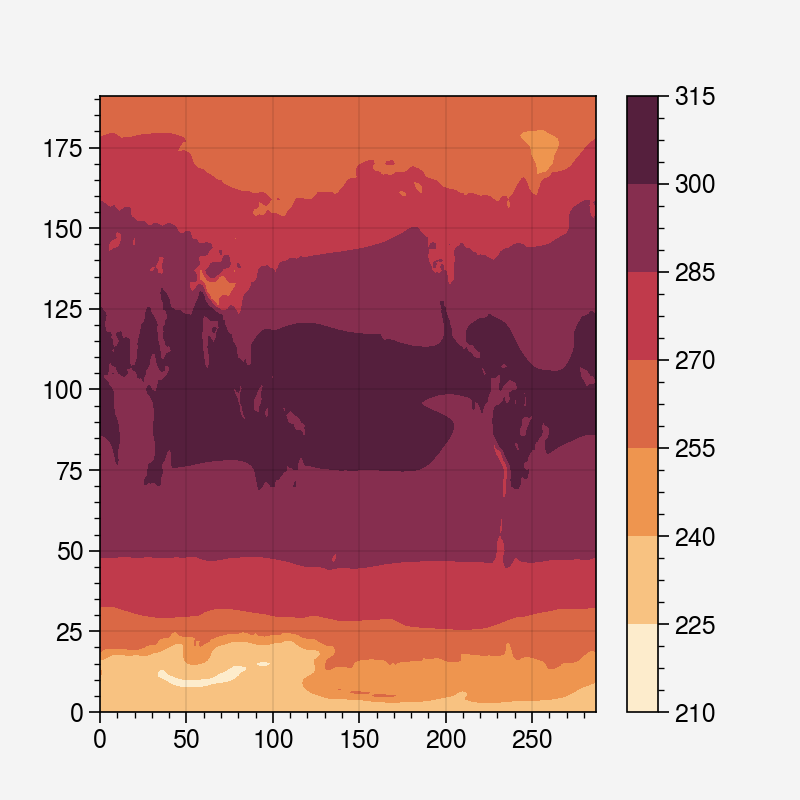

In [4]:
plt.contourf(ds_mean['tas'])
plt.colorbar()

### Plot with a map

However, we would like to plot this with map and control the map projection, label the lats and lons, etc.

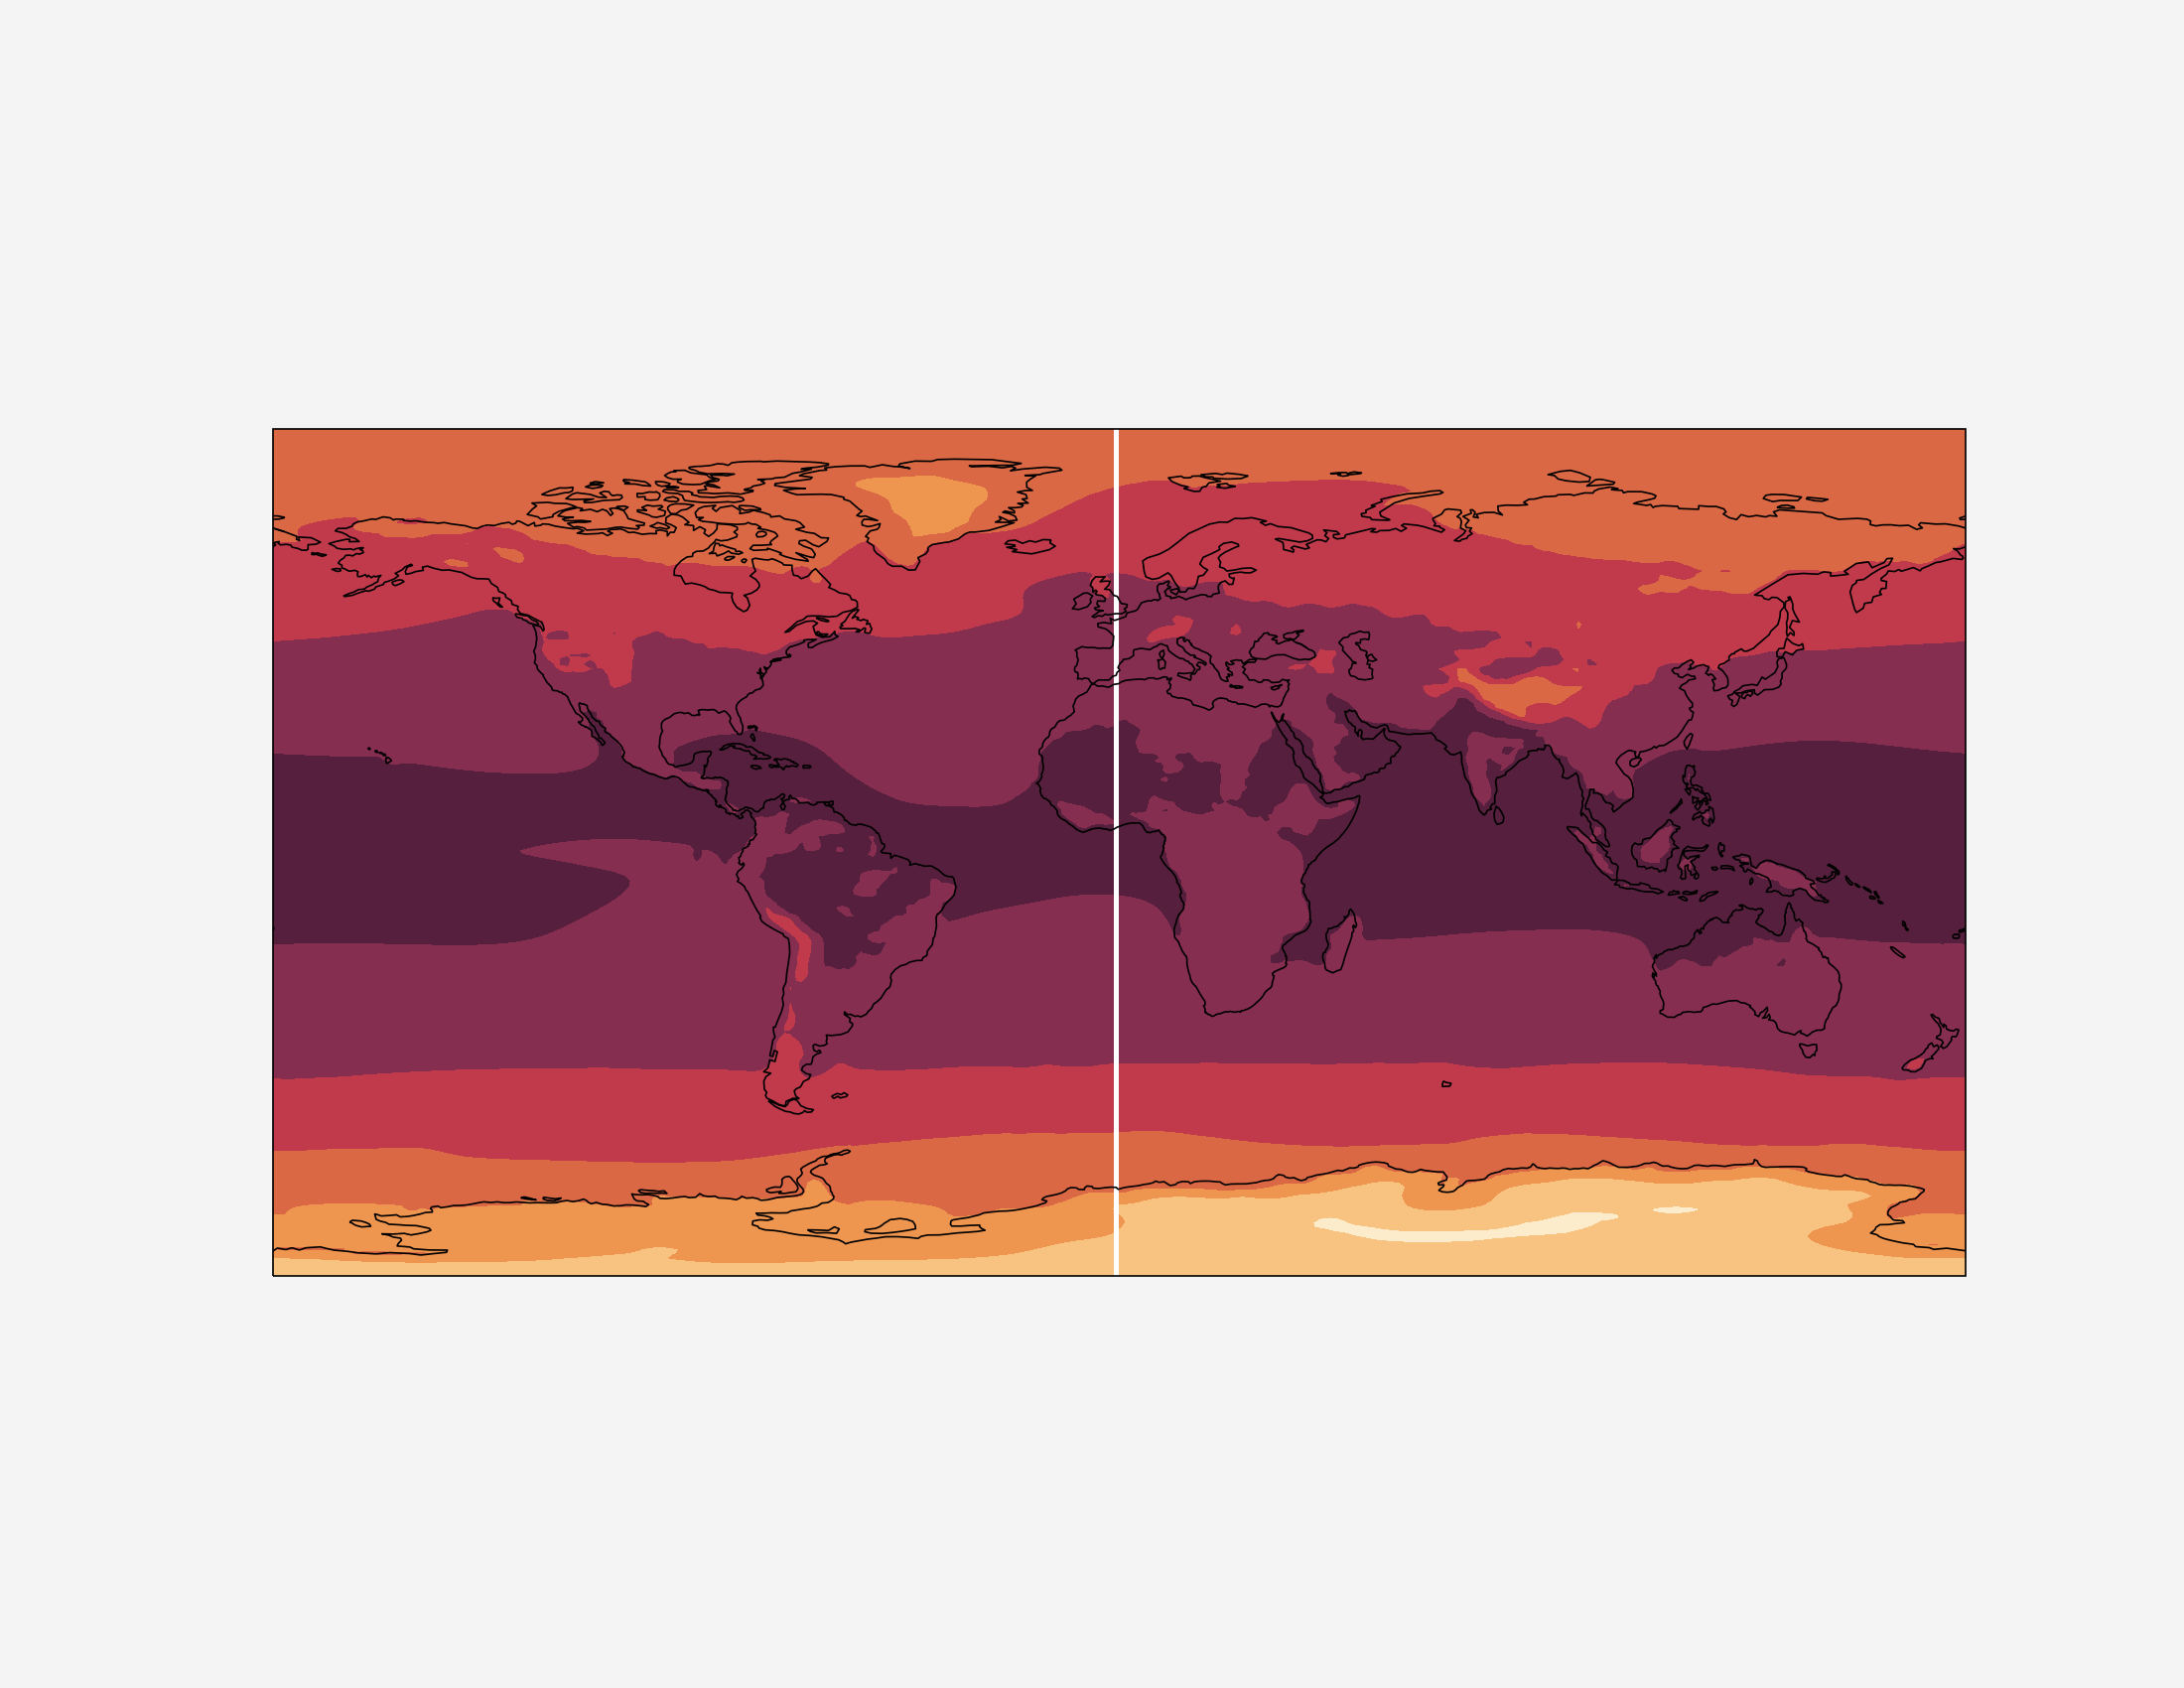

In [5]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Make a filled contour plot
ax.contourf(ds['lon'], ds['lat'], ds_mean['tas'],
            transform = ccrs.PlateCarree())

# Add coastlines
ax.coastlines() 

### Cyclic data and lat-lon labels

This figure has a couple of things we would like to change:
1. The stripe at 0 lon. This is due to the fact that `contourf` has no way to know that our data is cyclic in longitude. `cartopy` has a fix for this using `cartopy.util.add_cyclic_point`
2. No labels for the latitude and longitude. We will add lat-lon labels using `set_x(y)ticks` and `cticker`.

Make a copy of your cell and paste the copy into a new cell.

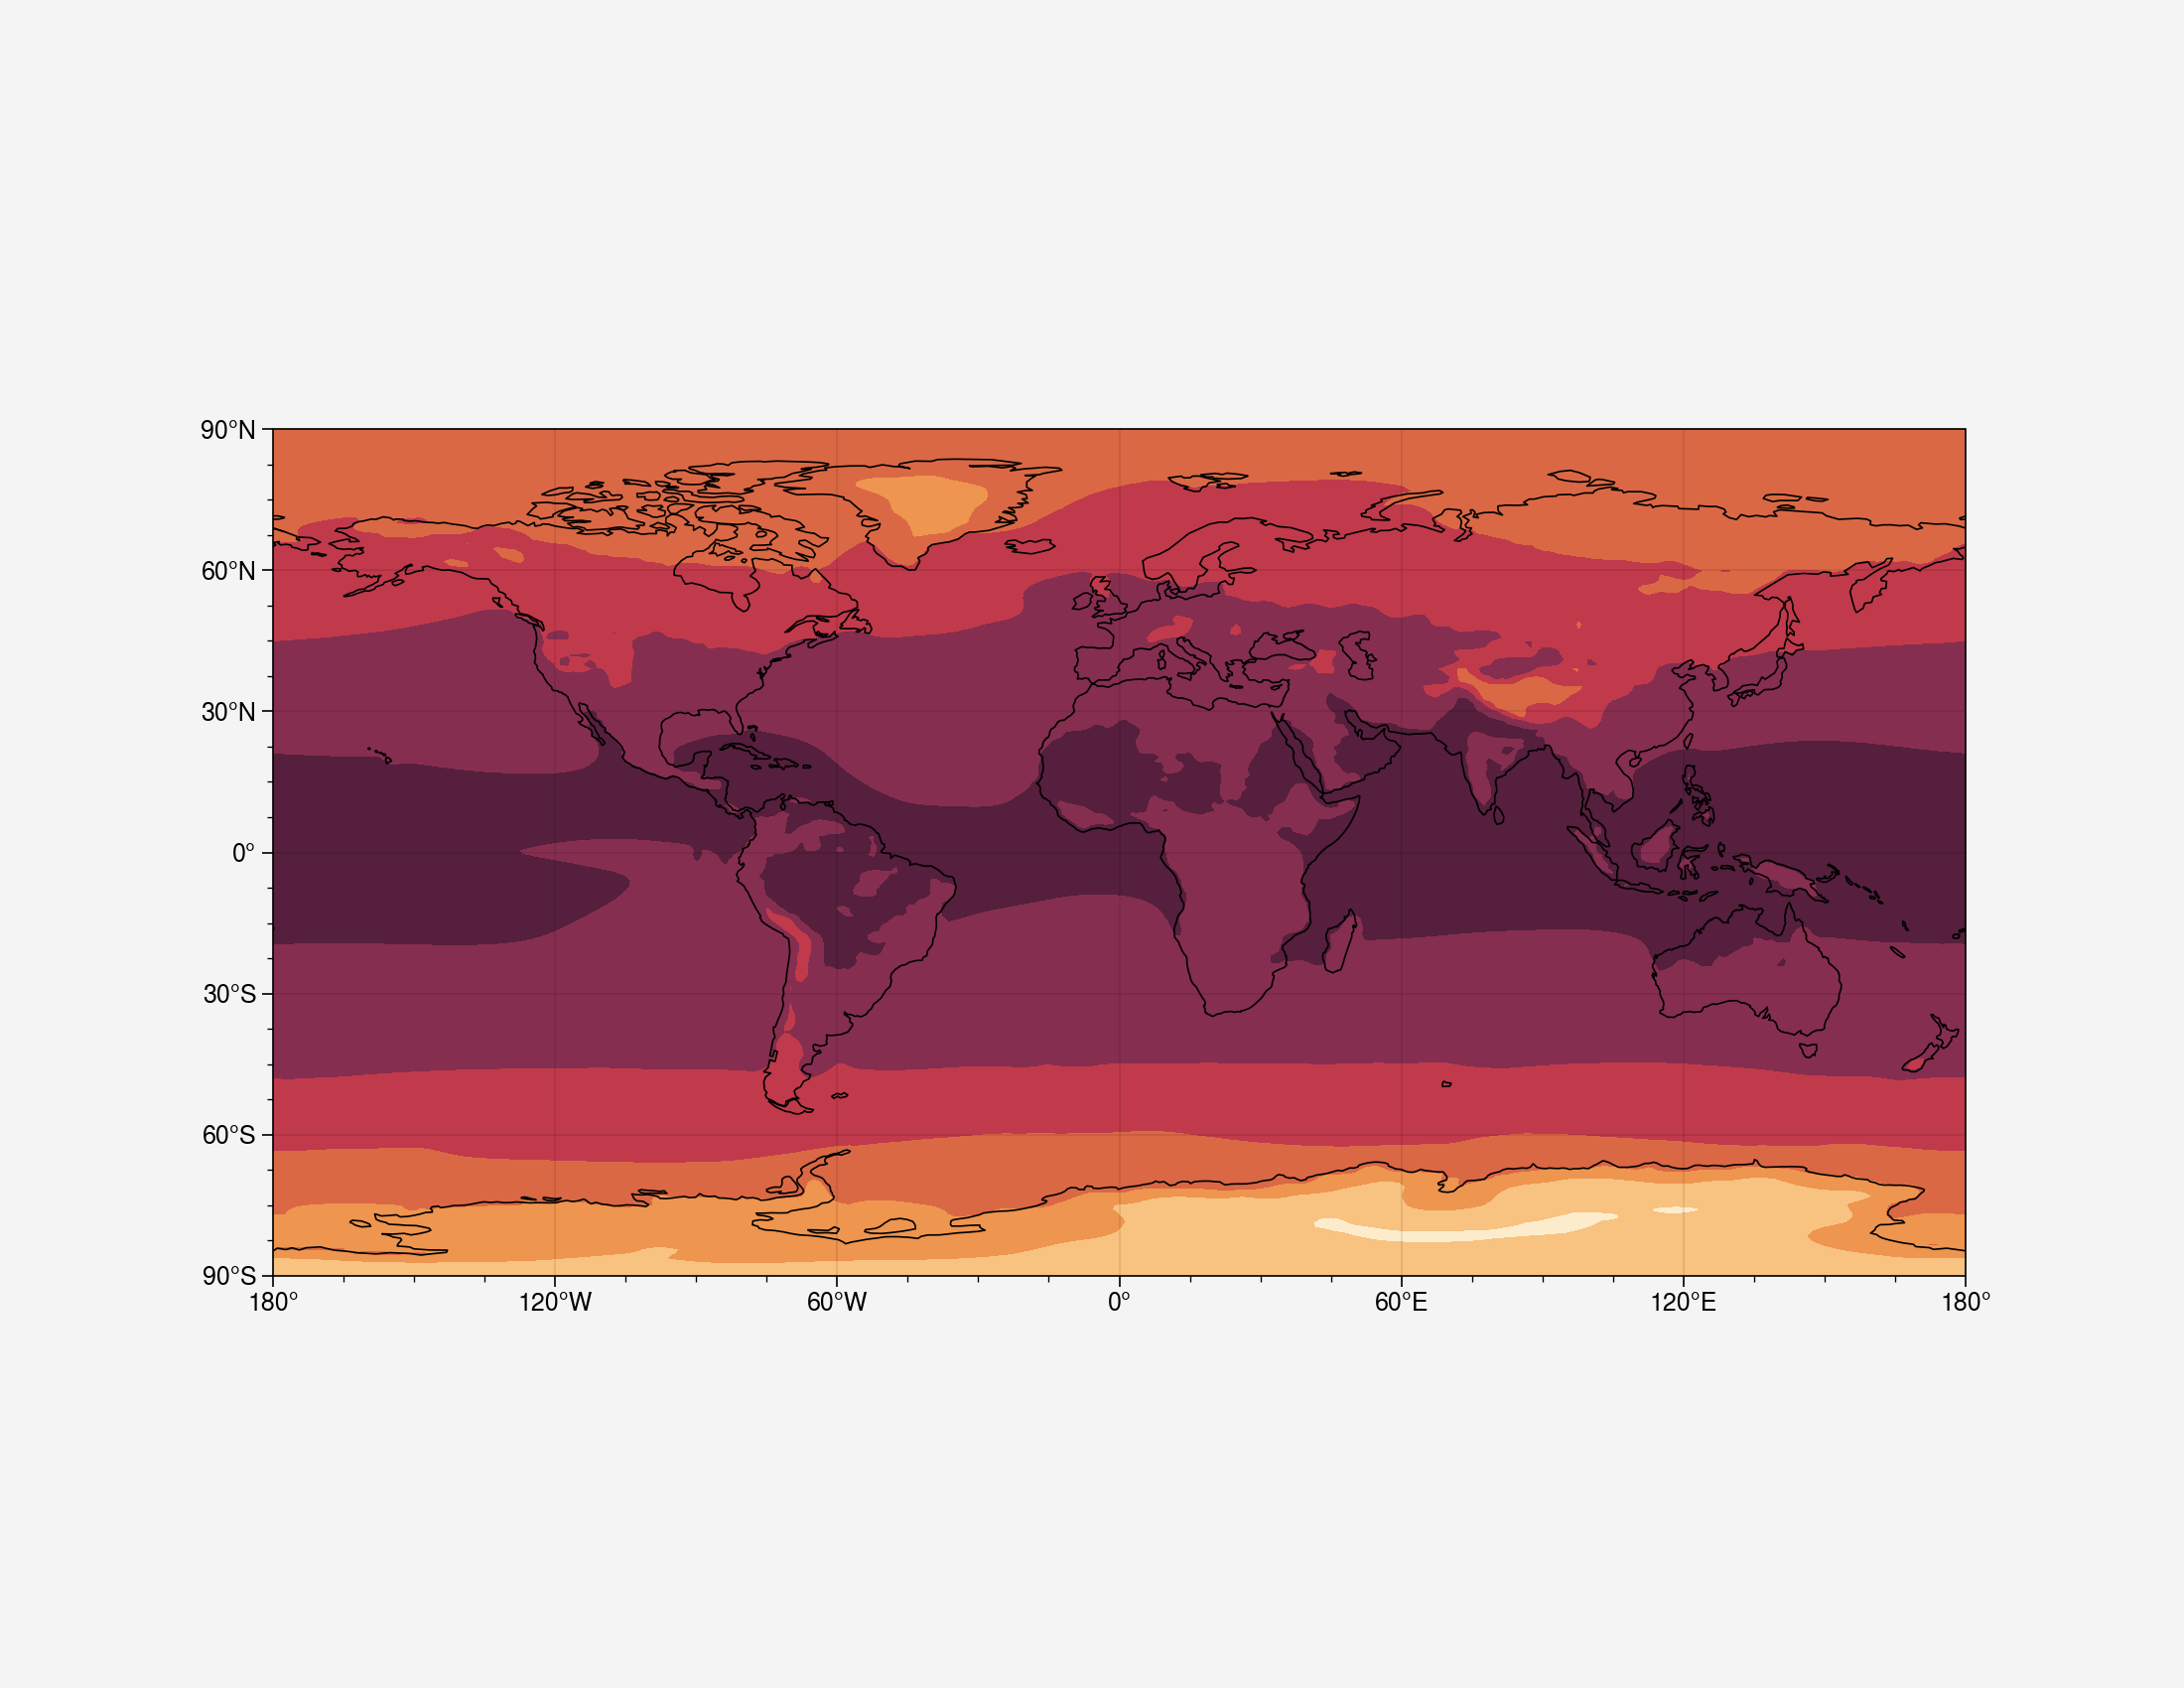

In [6]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean['tas']
data, lons = add_cyclic_point(data, coord=ds['lon'])

# Make a filled contour plot
cs=ax.contourf(lons, ds['lat'], data,
            transform = ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter) 

### Change the Colormap

The colors are not very nice for plotting temperature contours. Let’s choose a different colormap and add a colorbar. The [colormap options](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html) come from `matplotlib`. We will choose one called `coolwarm`.

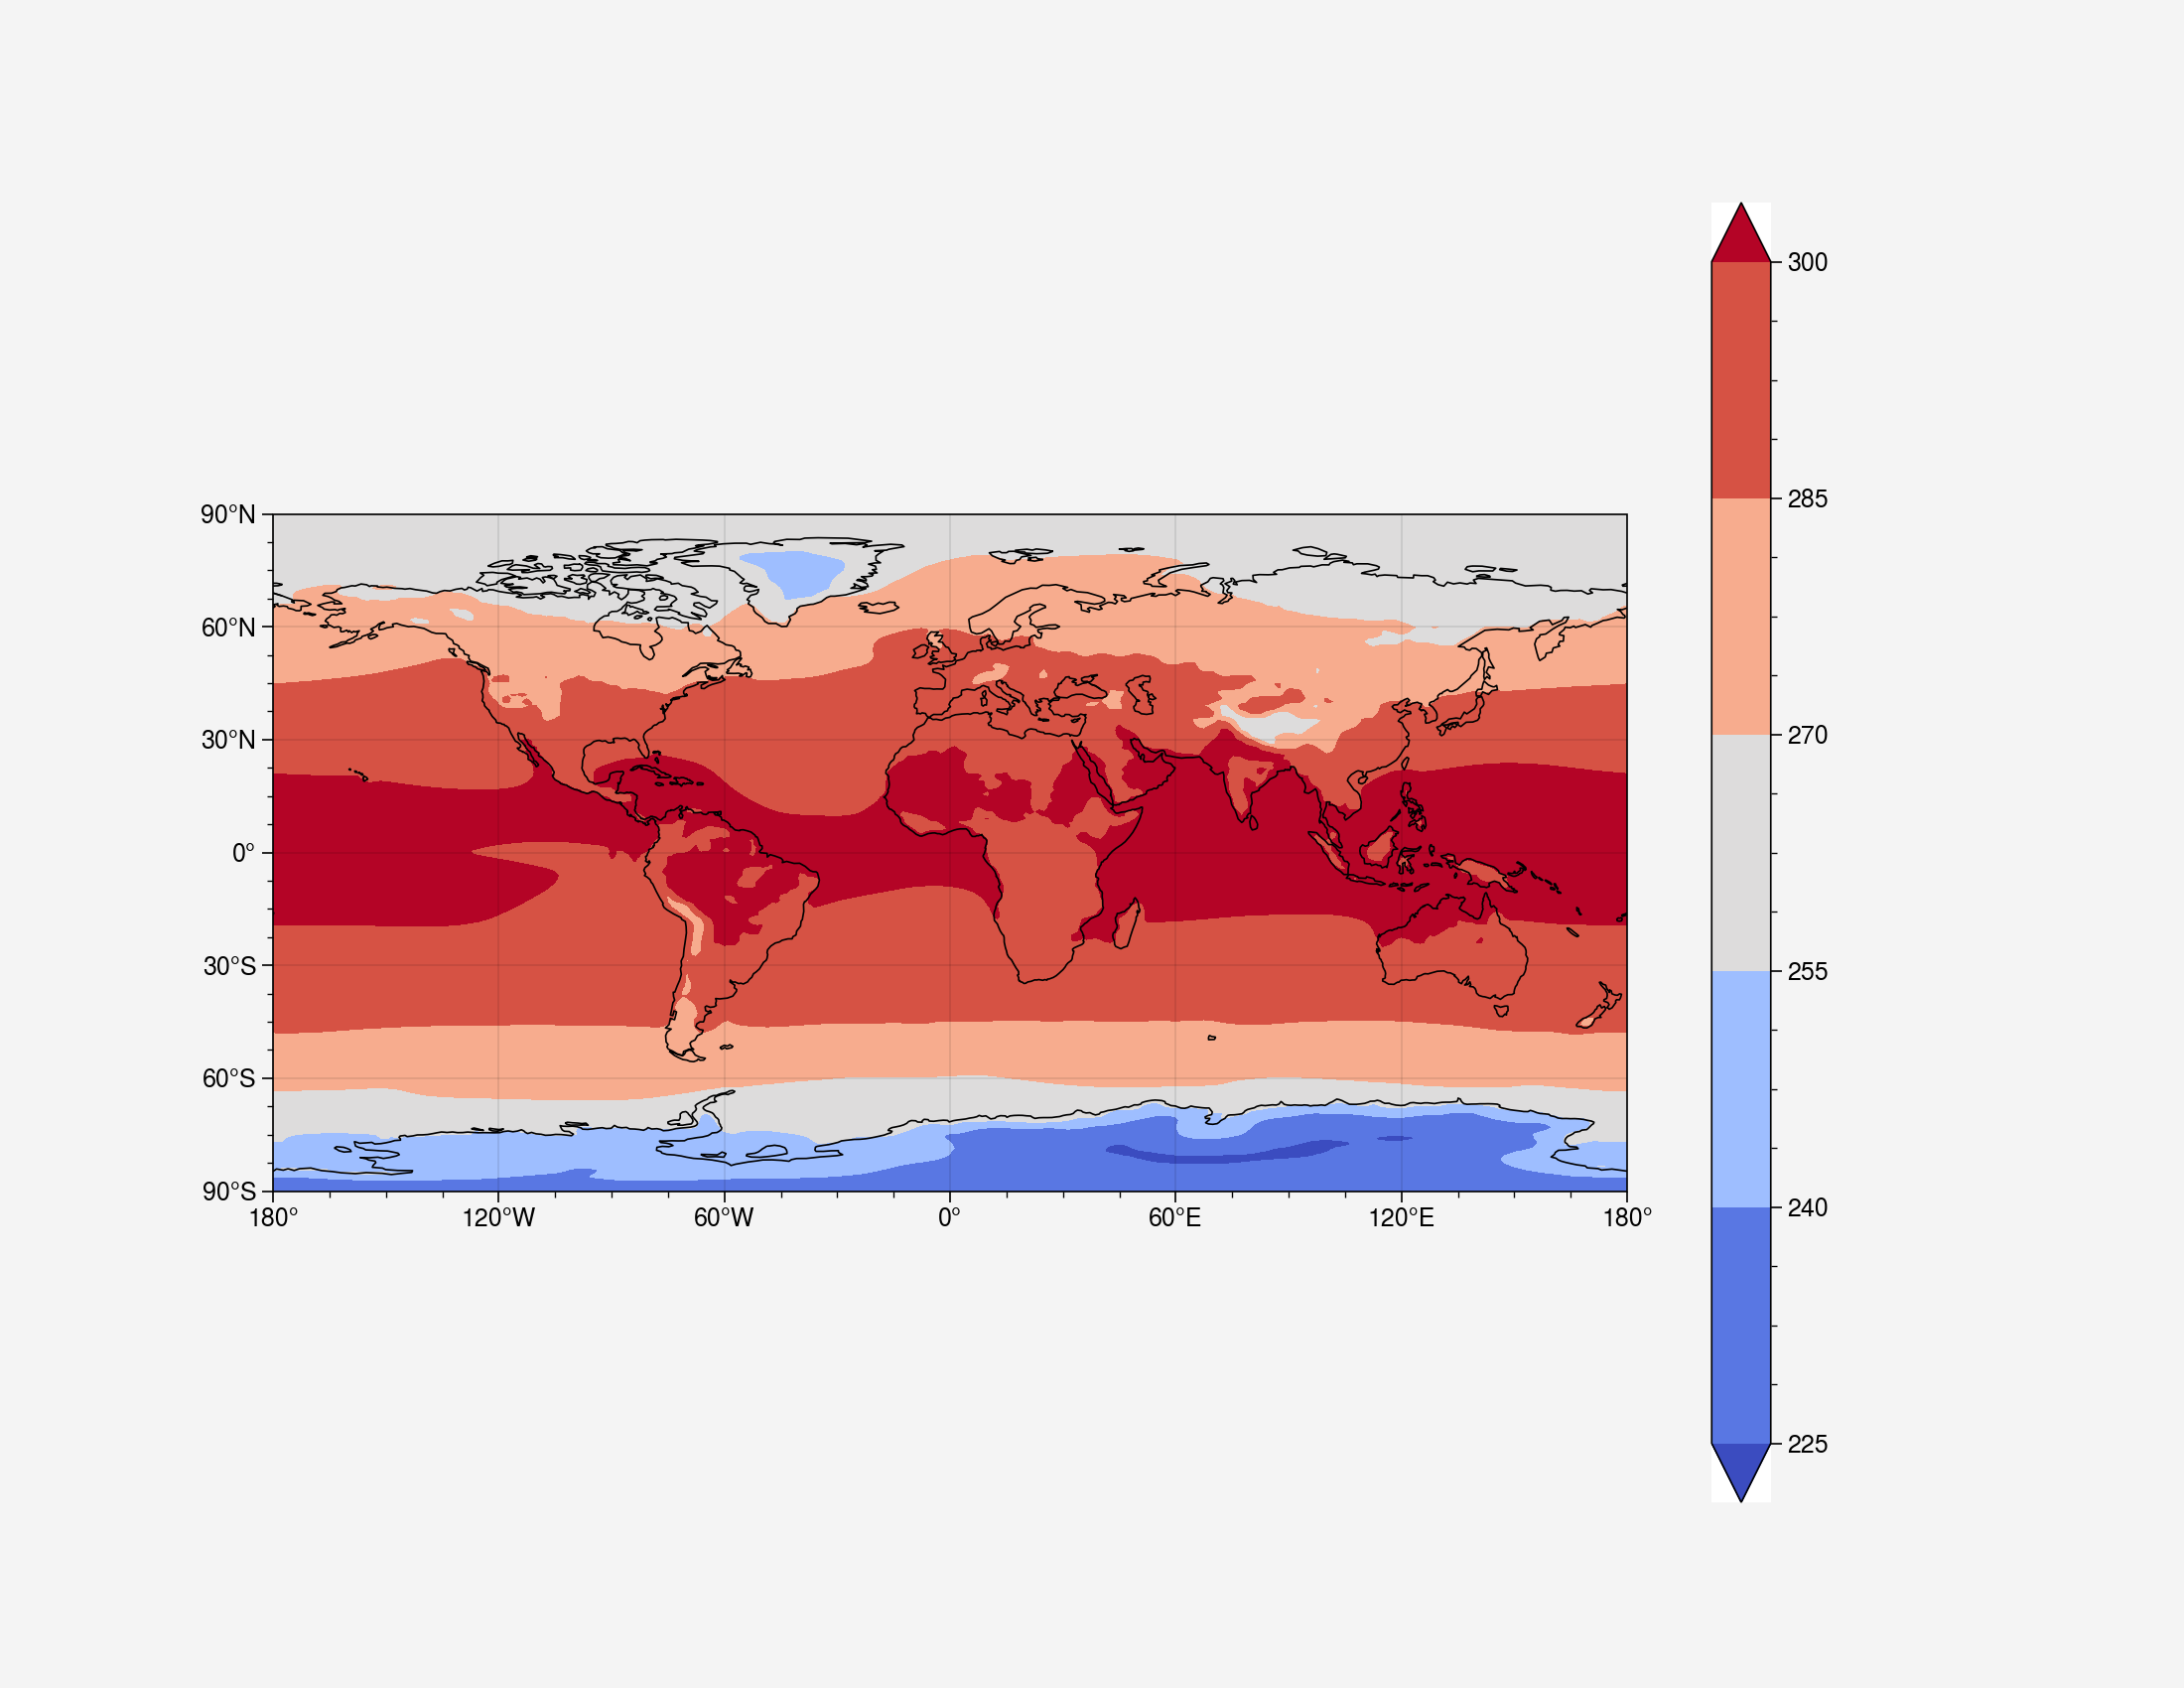

In [7]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean['tas']
data, lons = add_cyclic_point(data, coord=ds['lon'])

# Make a filled contour plot
cs=ax.contourf(lons, ds['lat'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add colorbar
cbar = plt.colorbar(cs) 

### Change the map projection

What if I want to use a different map projection? There aree many [map projections]( https://scitools.org.uk/cartopy/docs/latest/crs/projections.html) available. Let’s use the Robinson projection. We’ll also give the plot a title and label the colorbar:

Text(0.5, 1.0, 'NCAR-CCSM4 RCP4.5 2100-2299')

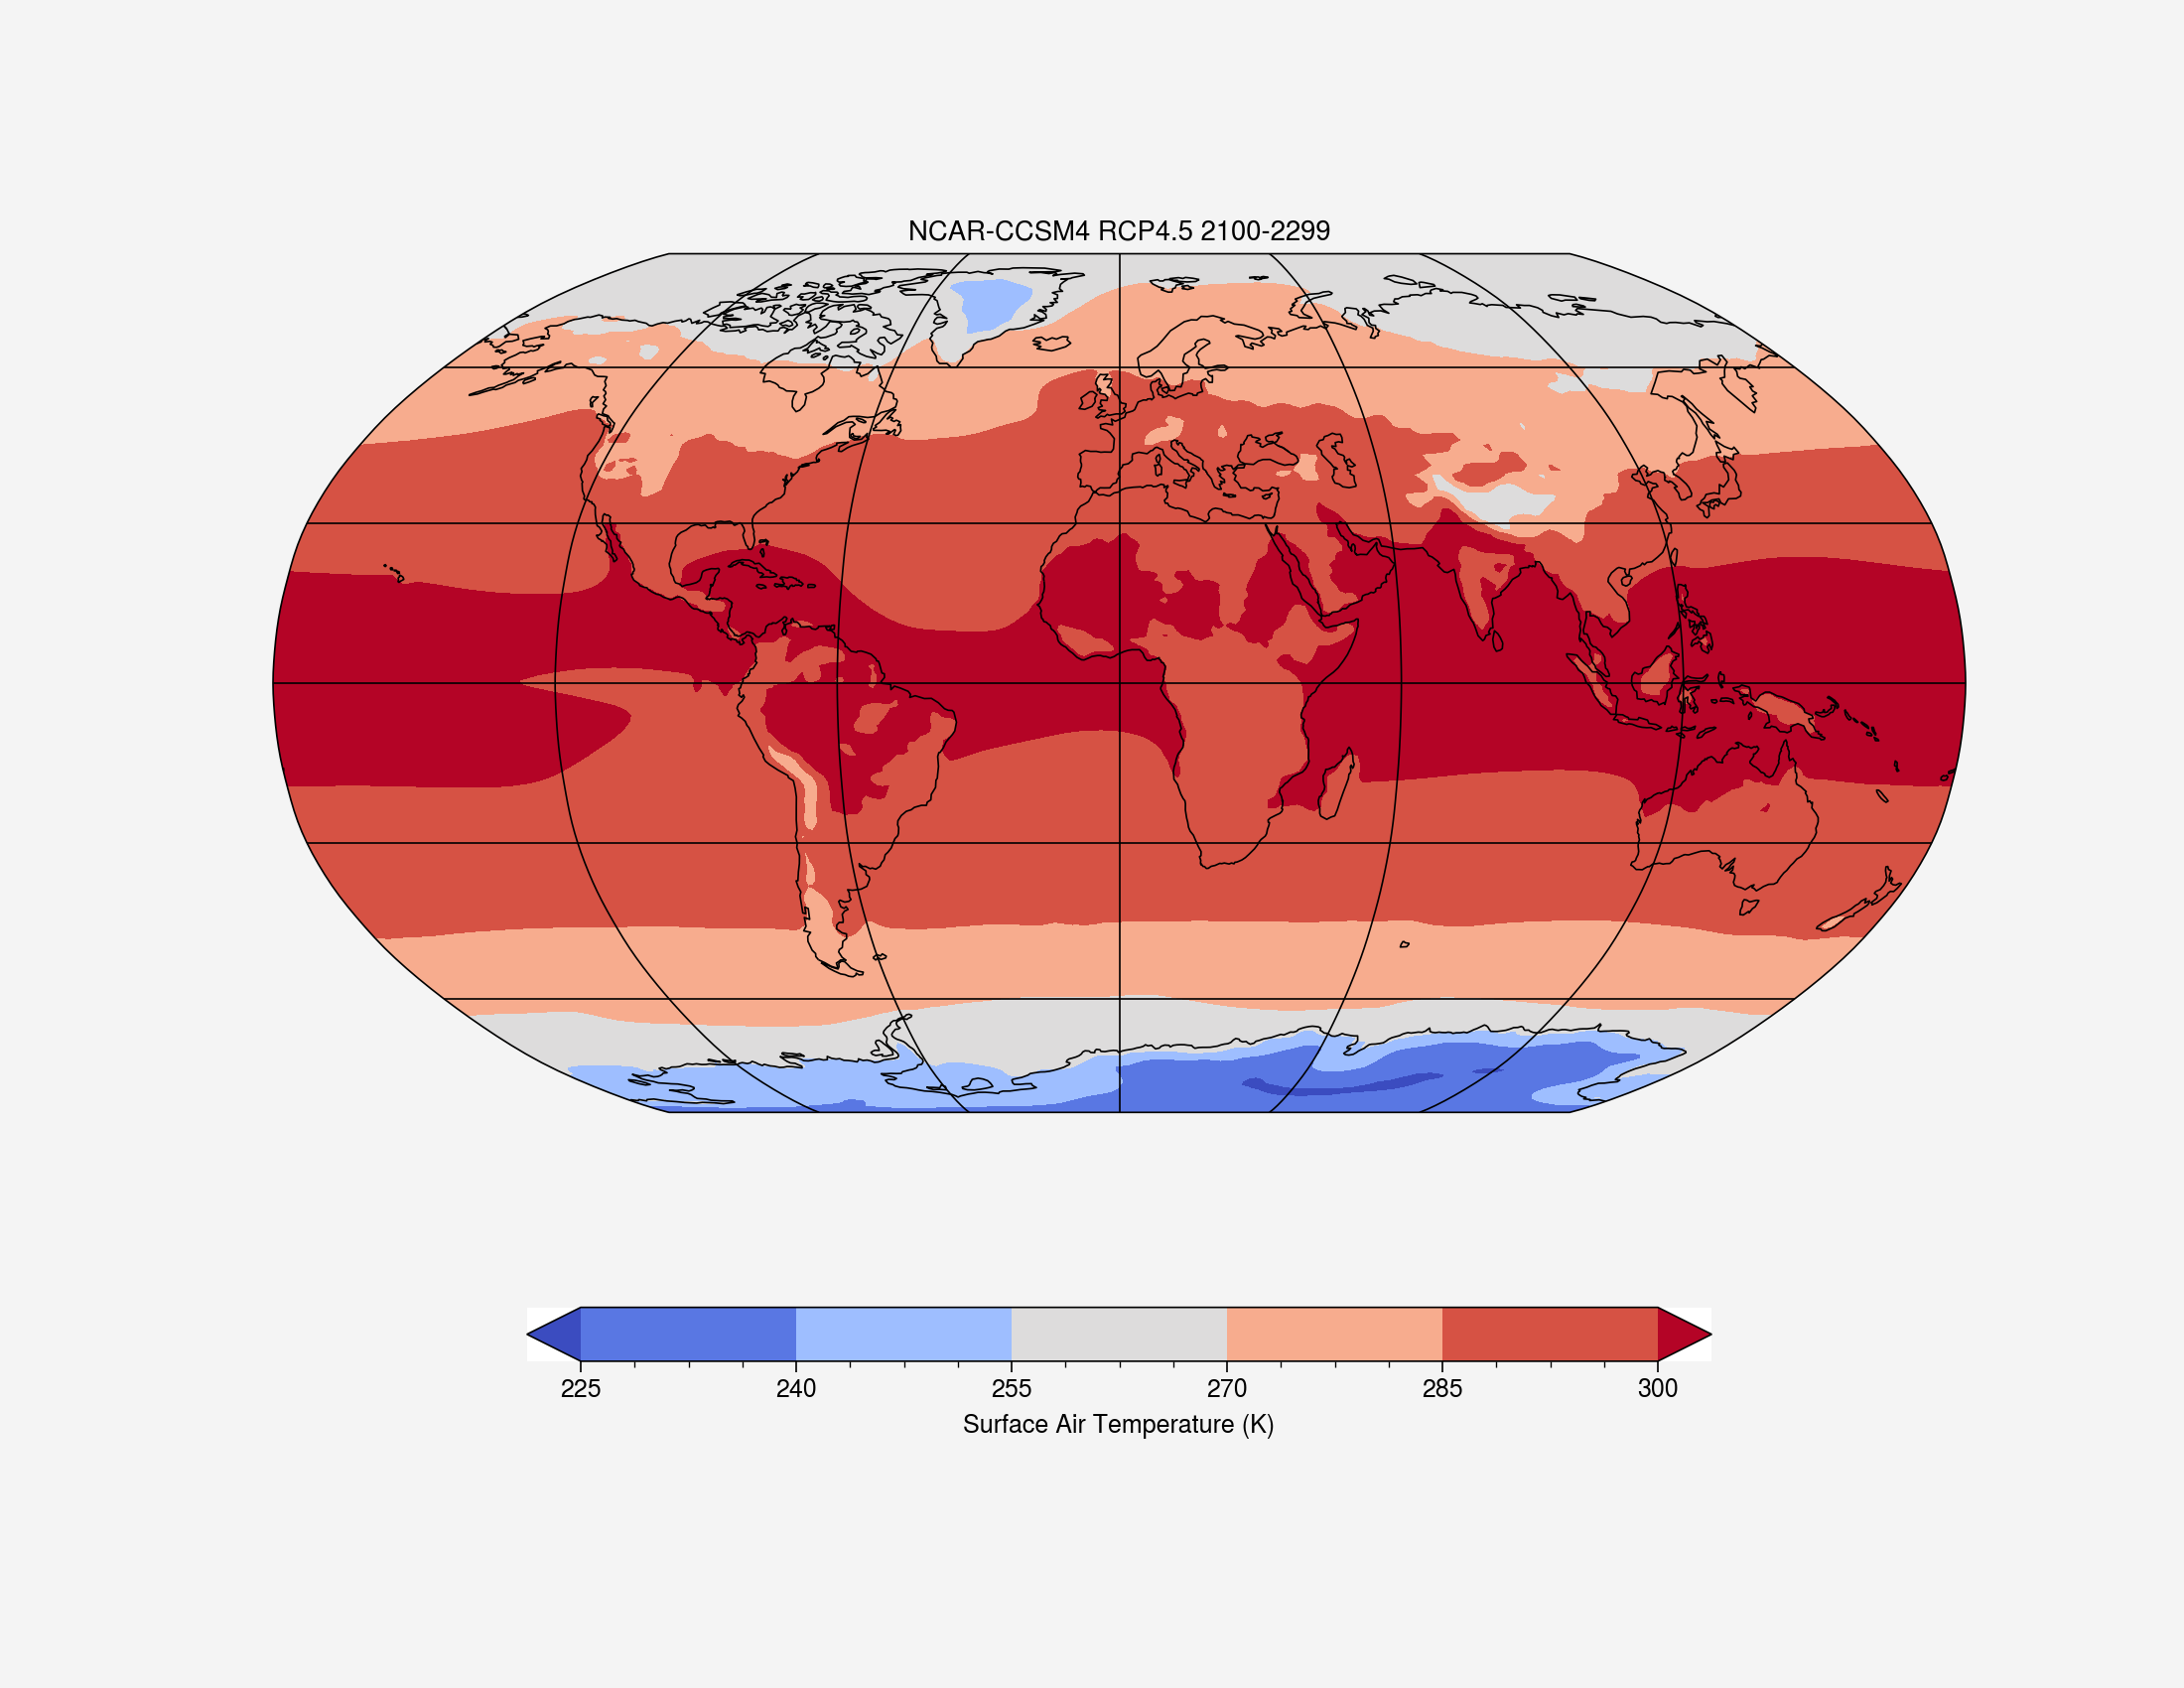

In [8]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.Robinson())

# Add cyclic point to data
data=ds_mean['tas']
data, lons = add_cyclic_point(data, coord=ds['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds['lat'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Air Temperature (K)')

# Add title
plt.title('NCAR-CCSM4 RCP4.5 2100-2299')

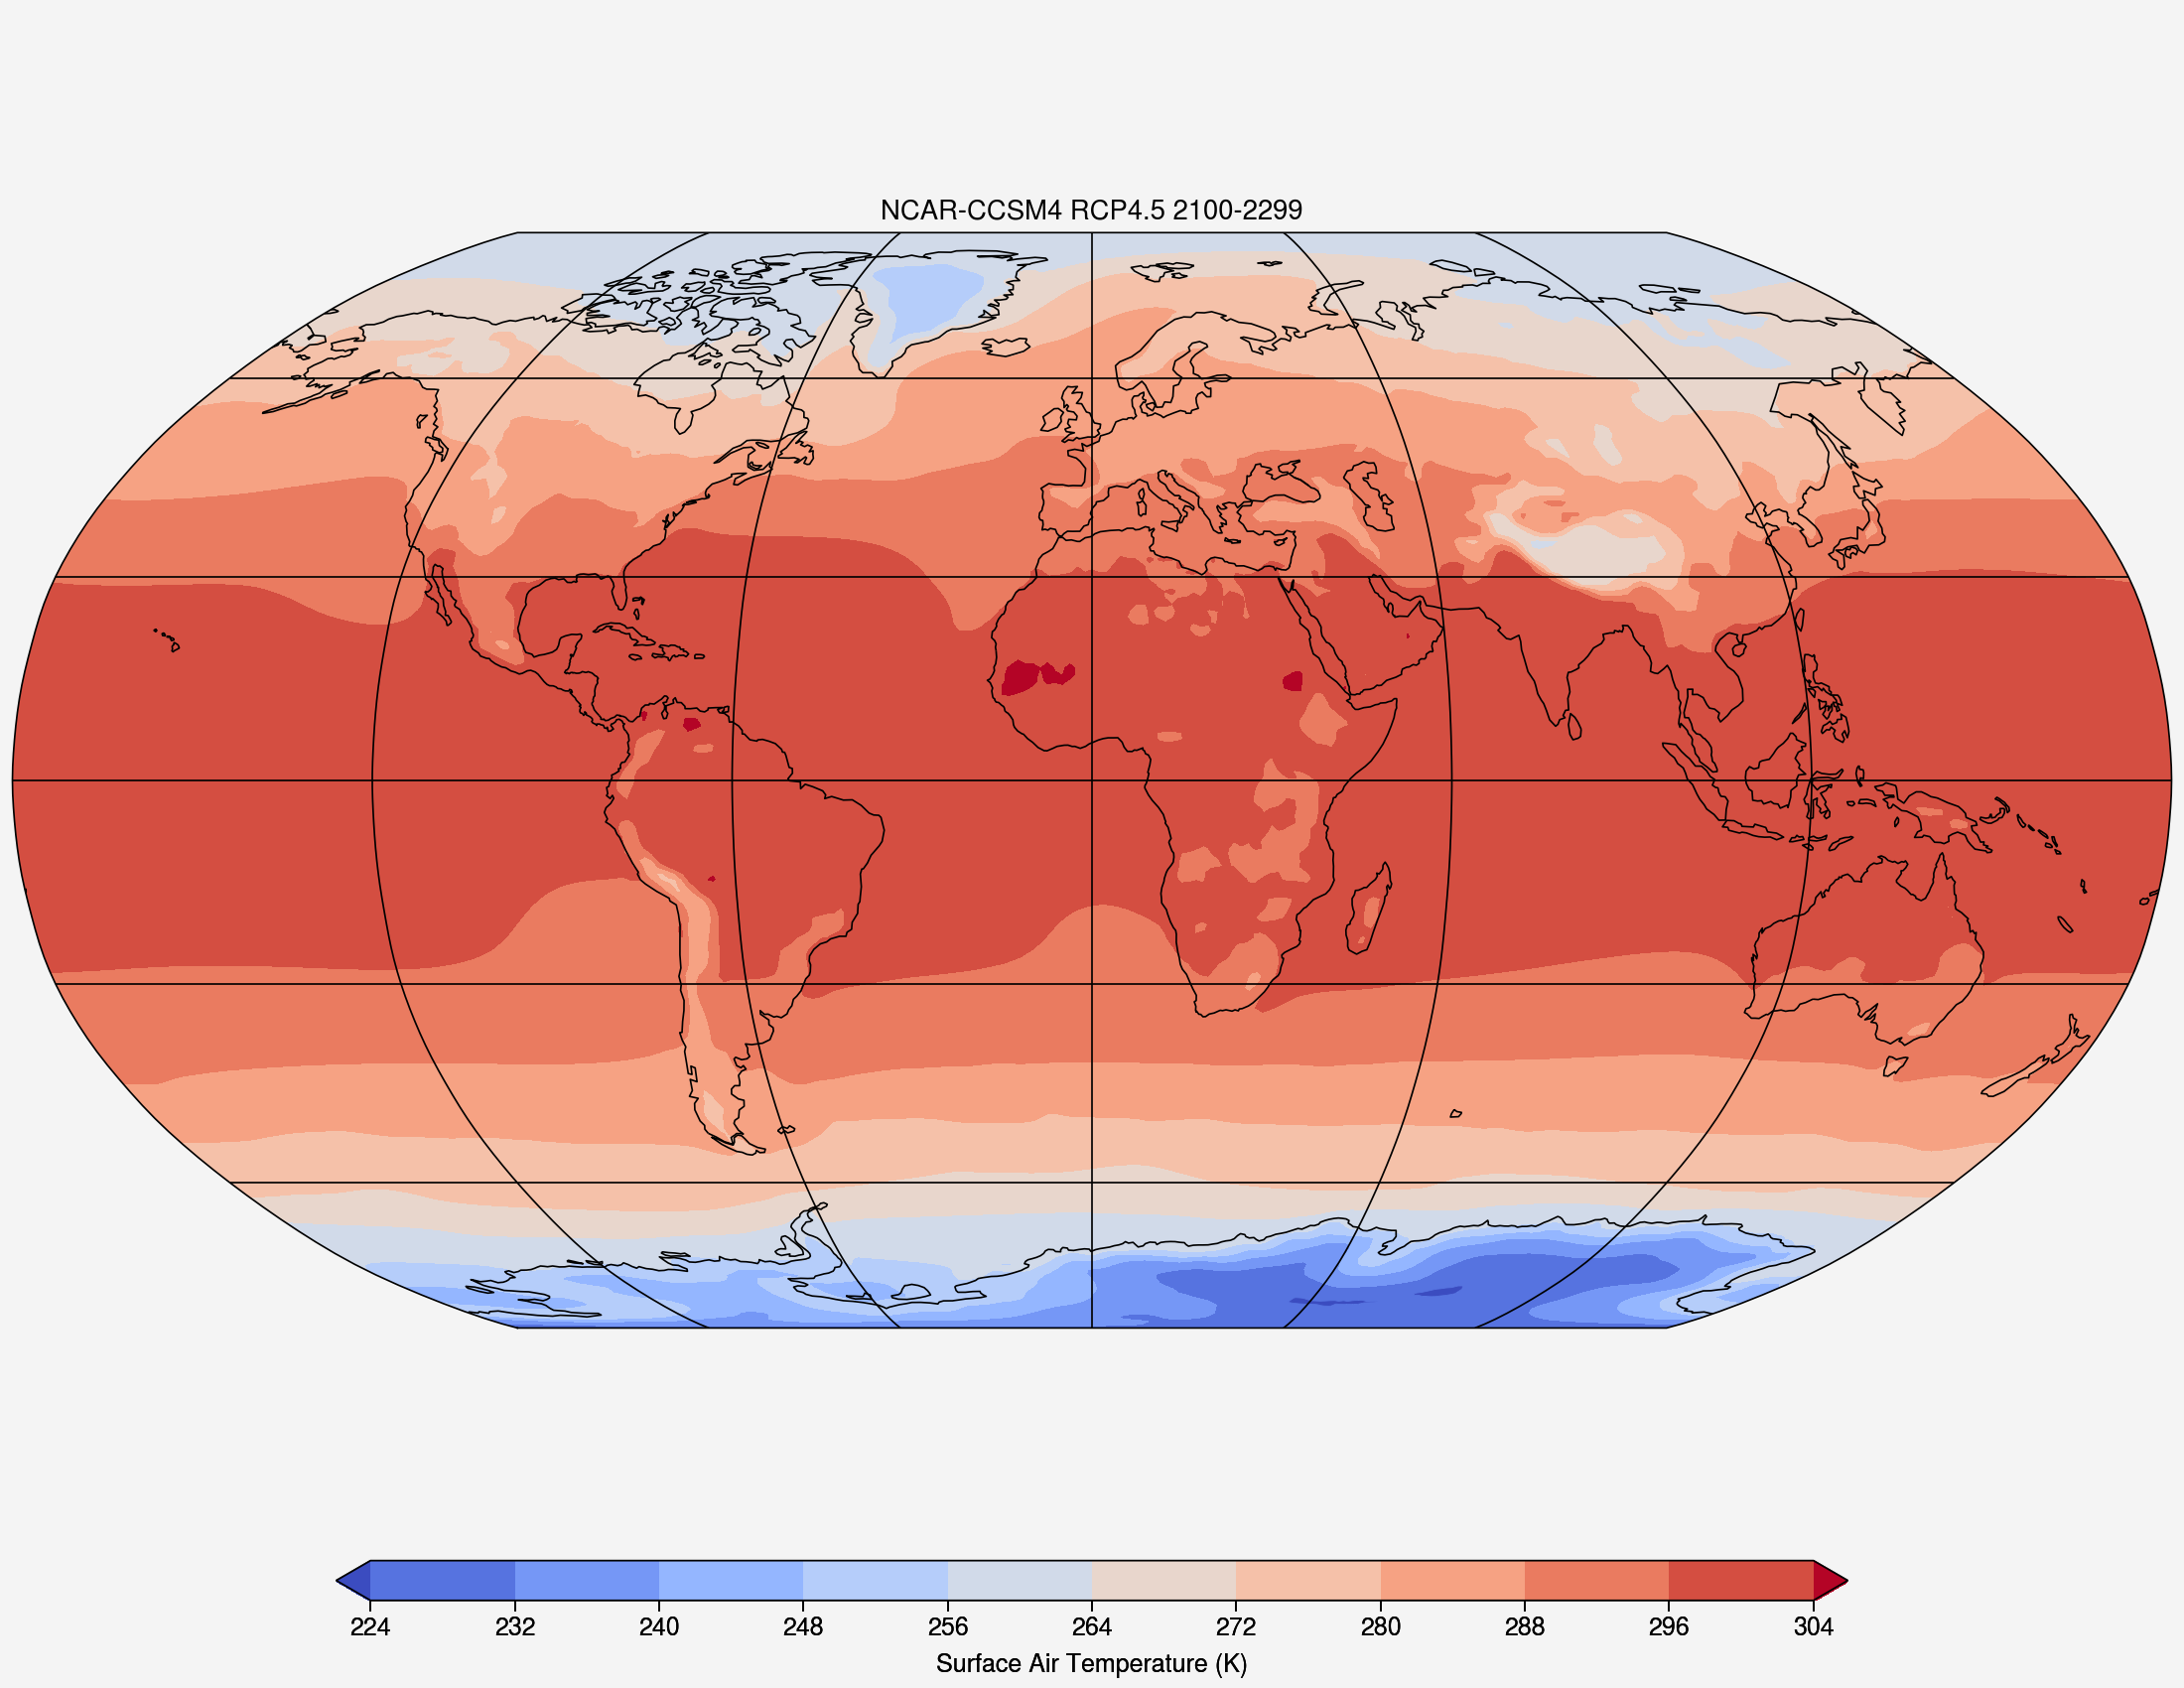

In [9]:
fig = pplt.figure(figwidth=11.0,figheight=8.5)
ax=fig.subplot(proj='robin')

# Add cyclic point to data
data=ds_mean['tas']
data, lons = add_cyclic_point(data, coord=ds['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds['lat'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = fig.colorbar(cs,shrink=0.7,loc='b',label='Surface Air Temperature (K)')

# Add title
ax.format(title='NCAR-CCSM4 RCP4.5 2100-2299')